<span style="color:#87CEEB; font-size:30px; font-weight:bold;">Desafío - Transformación y Manipulación de Datos (Parte II)
</span><br>
<span style="font-size:15px;">Marcela Alejandra Barrera Puentes</span>

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">Descripción</span><br>
<span style="font-size:15px;">La empresa ADL se dedica a la venta de productos a nivel regional en los Estados Unidos, con equipos de ventas que operan en diferentes estados. La compañía ha establecido un sistema de comisiones para incentivar a sus equipos de ventas a preferir la venta de productos de alto margen antes que los de bajo margen de utilidad.
Como Analista de Datos, le solicitan analizar información sobre las ventas realizadas por los equipos de ventas de ADL, incluyendo detalles sobre los productos vendidos, los clientes, las fechas de los pedidos y los plazos de entrega.
Para resolver este desafío deberás cargar datos desde Hojas de Excel del archivo US_Regional_Sales_Data.xlsx. En base a esto, debe generar una visualización de datos como la que se muestra en las hojas Reporte1 y Reporte2 del archivo reporte.xlsx.
Para cumplir con lo solicitado, puedes aplicar los siguientes pasos:</span><br>

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">1.</span>
<span style="font-size:15px;">Carga los datos de cada pestaña del archivo US_Regional_Sales_Data.xlsx en un DataFrame independiente. (hint: Puedes obtener los nombres de las hojas usando pd.ExcelFile(archivo).sheet_names)</span>


In [132]:
# Se instala pandas
!pip install pandas

# Se importa pandas
import pandas as pd

# Se lee el archivo Excel: US_Regional_Sales_Data.xlsx
archivo_excel = '/Users/marce/Projects_Marce/Desafio_Latam/US_Regional_Sales_Data.xlsx'

In [133]:
# Se obtienen los nombres de las hojas del archivo Excel: US_Regional_Sales_Data.xlsx
nombre_hojas_excel = pd.ExcelFile(archivo_excel).sheet_names

# Se visualizan los nombres de las hojas contenidas en el archivo Excel: US_Regional_Sales_Data.xlsx
print("Nombre de las hojas: ", nombre_hojas_excel)

Nombre de las hojas:  ['Sales Orders Sheet', 'Customers Sheet', 'Store Locations Sheet', 'Products Sheet', 'Sales Team Sheet']


In [134]:
# Buena práctica visualización de las primeras 5 filas
vista_rapida_hojas = {}
# Se cargan las primeras filas de cada hoja
for cada_hoja in nombre_hojas_excel:
    df = pd.read_excel(archivo_excel, sheet_name=cada_hoja)
    vista_rapida_hojas[cada_hoja] = df.head()
# Se imprime la información de cada hoja
for nombre, datos in vista_rapida_hojas.items():
    print(f"\nContenido de la hoja '{nombre}':")
    print(datos)


Contenido de la hoja 'Sales Orders Sheet':
   OrderNumber Sales Channel WarehouseCode ProcuredDate  OrderDate   ShipDate  \
0  SO - 000101      In-Store  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-14   
1  SO - 000102        Online  WARE-NMK1003   2017-12-31 2018-05-31 2018-06-22   
2  SO - 000103   Distributor  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-21   
3  SO - 000104     Wholesale  WARE-NMK1003   2017-12-31 2018-05-31 2018-06-02   
4  SO - 000105   Distributor  WARE-NMK1003   2018-04-10 2018-05-31 2018-06-16   

  DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  _StoreID  _ProductID  \
0   2018-06-19          USD             6           15       259          12   
1   2018-07-02          USD            14           20       196          27   
2   2018-07-01          USD            21           16       213          16   
3   2018-06-07          USD            28           48       107          23   
4   2018-06-26          USD            22           49       111     

In [135]:
# Se crea un diccionario para almacenar los DataFrames
dataframes = {}
# Se cargan los datos de cada hoja en un DataFrame independiente
for hoja in nombre_hojas_excel:
    dataframes[hoja] = pd.read_excel(archivo_excel, sheet_name=hoja)

In [136]:
# Ejemplo de acceso y visualización de Sales Team Sheet
sales_team_df = dataframes['Sales Team Sheet']
print(sales_team_df.head())

   _SalesTeamID       Sales Team     Region
0             1   Adam Hernandez  Northeast
1             2    Keith Griffin  Northeast
2             3      Jerry Green       West
3             4  Chris Armstrong  Northeast
4             5    Stephen Payne      South


<span style="color:#87CEEB; font-size:20px; font-weight:bold;">2.</span>
<span style="font-size:15px;">Cruza todos los DataFrames usando validación many_to_one, y guarda el resultado en una nueva variable llamada df_base</span>

In [137]:
# Se define como DataFrame base Sales Orders Sheet
df_base = dataframes['Sales Orders Sheet']

In [138]:
# Se realiza la relación con la hoja Customer Sheet
df_base = df_base.merge(dataframes['Customers Sheet'],
                        left_on='_CustomerID',
                        right_on='_CustomerID',
                        validate='many_to_one'
                       )
# Se visualiza
print(df_base.head())

   OrderNumber Sales Channel WarehouseCode ProcuredDate  OrderDate   ShipDate  \
0  SO - 000101      In-Store  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-14   
1  SO - 000102        Online  WARE-NMK1003   2017-12-31 2018-05-31 2018-06-22   
2  SO - 000103   Distributor  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-21   
3  SO - 000104     Wholesale  WARE-NMK1003   2017-12-31 2018-05-31 2018-06-02   
4  SO - 000105   Distributor  WARE-NMK1003   2018-04-10 2018-05-31 2018-06-16   

  DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  _StoreID  _ProductID  \
0   2018-06-19          USD             6           15       259          12   
1   2018-07-02          USD            14           20       196          27   
2   2018-07-01          USD            21           16       213          16   
3   2018-06-07          USD            28           48       107          23   
4   2018-06-26          USD            22           49       111          26   

   Order Quantity  Discount Appl

In [139]:
# Se realiza la relación con la hoja Store Locations Sheet
df_base = df_base.merge(dataframes['Store Locations Sheet'],
                        left_on='_StoreID',
                        right_on='_StoreID',
                        validate='many_to_one'
                       )
# Se visualiza
print(df_base.head())

   OrderNumber Sales Channel WarehouseCode ProcuredDate  OrderDate   ShipDate  \
0  SO - 000101      In-Store  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-14   
1  SO - 000102        Online  WARE-NMK1003   2017-12-31 2018-05-31 2018-06-22   
2  SO - 000103   Distributor  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-21   
3  SO - 000104     Wholesale  WARE-NMK1003   2017-12-31 2018-05-31 2018-06-02   
4  SO - 000105   Distributor  WARE-NMK1003   2018-04-10 2018-05-31 2018-06-16   

  DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  ...  Type  Latitude  \
0   2018-06-19          USD             6           15  ...  Town  40.64092   
1   2018-07-02          USD            14           20  ...  City  38.98223   
2   2018-07-01          USD            21           16  ...  City  42.27087   
3   2018-06-07          USD            28           48  ...  City  41.30815   
4   2018-06-26          USD            22           49  ...  City  41.55815   

   Longitude  AreaCode  Population  Ho

In [140]:
# Se realiza la relación con la hoja Products Sheet
df_base = df_base.merge(dataframes['Products Sheet'],
                        left_on='_ProductID',
                        right_on='_ProductID',
                        validate='many_to_one'
                       )
print(df_base.head())

   OrderNumber Sales Channel WarehouseCode ProcuredDate  OrderDate   ShipDate  \
0  SO - 000101      In-Store  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-14   
1  SO - 000102        Online  WARE-NMK1003   2017-12-31 2018-05-31 2018-06-22   
2  SO - 000103   Distributor  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-21   
3  SO - 000104     Wholesale  WARE-NMK1003   2017-12-31 2018-05-31 2018-06-02   
4  SO - 000105   Distributor  WARE-NMK1003   2018-04-10 2018-05-31 2018-06-16   

  DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  ...  Latitude  \
0   2018-06-19          USD             6           15  ...  40.64092   
1   2018-07-02          USD            14           20  ...  38.98223   
2   2018-07-01          USD            21           16  ...  42.27087   
3   2018-06-07          USD            28           48  ...  41.30815   
4   2018-06-26          USD            22           49  ...  41.55815   

   Longitude  AreaCode  Population  Household Income  Median Income  \
0  

In [141]:
# Se realiza la relación con la hoja Sales Team Sheet
df_base = df_base.merge(dataframes['Sales Team Sheet'],
                        left_on='_SalesTeamID',
                        right_on='_SalesTeamID',
                        validate='many_to_one'
                       )
print(df_base.head())

   OrderNumber Sales Channel WarehouseCode ProcuredDate  OrderDate   ShipDate  \
0  SO - 000101      In-Store  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-14   
1  SO - 000102        Online  WARE-NMK1003   2017-12-31 2018-05-31 2018-06-22   
2  SO - 000103   Distributor  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-21   
3  SO - 000104     Wholesale  WARE-NMK1003   2017-12-31 2018-05-31 2018-06-02   
4  SO - 000105   Distributor  WARE-NMK1003   2018-04-10 2018-05-31 2018-06-16   

  DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  ...  AreaCode  \
0   2018-06-19          USD             6           15  ...       631   
1   2018-07-02          USD            14           20  ...       913   
2   2018-07-01          USD            21           16  ...       734   
3   2018-06-07          USD            28           48  ...       203   
4   2018-06-26          USD            22           49  ...       203   

   Population  Household Income  Median Income  Land Area  Water Area  \
0

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">3.</span>
<span style="font-size:15px;">Agrega las siguientes columnas a df_ base</span>

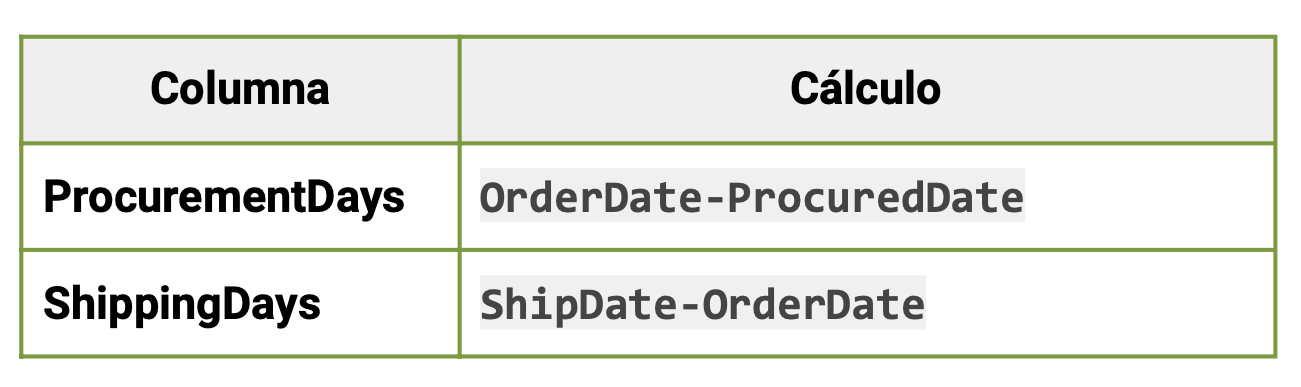

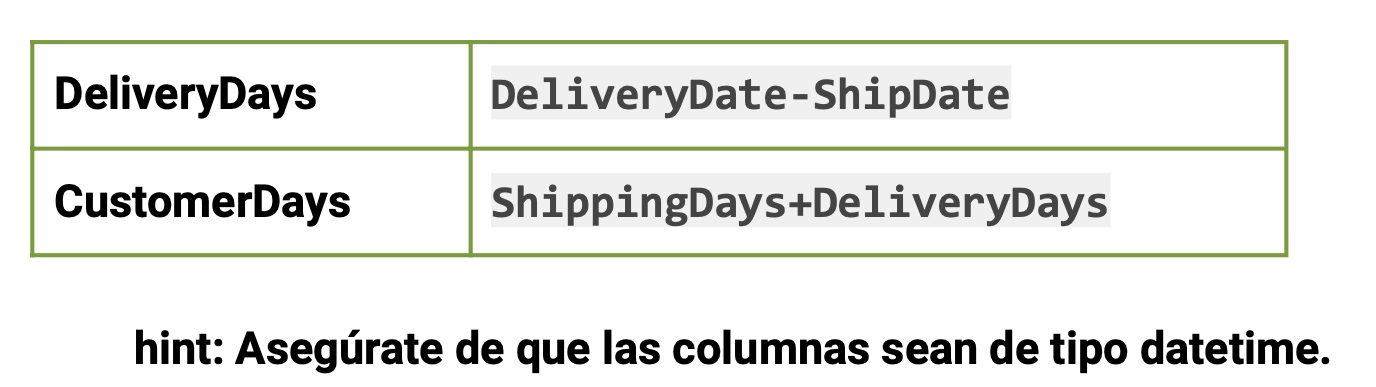

In [142]:
# Se asegura que las columnas sean de tipo datetime
df_base['OrderDate'] = pd.to_datetime(df_base['OrderDate'])
df_base['ProcuredDate'] = pd.to_datetime(df_base['ProcuredDate'])
df_base['ShipDate'] = pd.to_datetime(df_base['ShipDate'])
df_base['DeliveryDate'] = pd.to_datetime(df_base['DeliveryDate'])

In [143]:
# Se calcula ProcurementDays
df_base['ProcurementDays'] = (df_base['OrderDate'] - df_base['ProcuredDate']).dt.days
# Se calcula ShippingDays
df_base['ShippingDays'] = (df_base['ShipDate'] - df_base['OrderDate']).dt.days
# Se calcula DeliveryDays
df_base['DeliveryDays'] = (df_base['DeliveryDate'] - df_base['ShipDate']).dt.days
# Se calcula CustomerDays
df_base['CustomerDays'] = df_base['ShippingDays'] + df_base['DeliveryDays']
# Se visualizan las primeras filas del DataFrame actualizado
print(df_base.head())

   OrderNumber Sales Channel WarehouseCode ProcuredDate  OrderDate   ShipDate  \
0  SO - 000101      In-Store  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-14   
1  SO - 000102        Online  WARE-NMK1003   2017-12-31 2018-05-31 2018-06-22   
2  SO - 000103   Distributor  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-21   
3  SO - 000104     Wholesale  WARE-NMK1003   2017-12-31 2018-05-31 2018-06-02   
4  SO - 000105   Distributor  WARE-NMK1003   2018-04-10 2018-05-31 2018-06-16   

  DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  ...  Land Area  \
0   2018-06-19          USD             6           15  ...  135481314   
1   2018-07-02          USD            14           20  ...  194562941   
2   2018-07-01          USD            21           16  ...   72727009   
3   2018-06-07          USD            28           48  ...   48407373   
4   2018-06-26          USD            22           49  ...   73880017   

   Water Area         Time Zone      Product Name      Sales Team   

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">4.</span>
<span style="font-size:15px;">Agrega una nueva columna discreta al df_base, con el nombre CustomerDaysInterval
que clasifique los valores de la columna CustomerDays en los siguientes intervalos:</span>

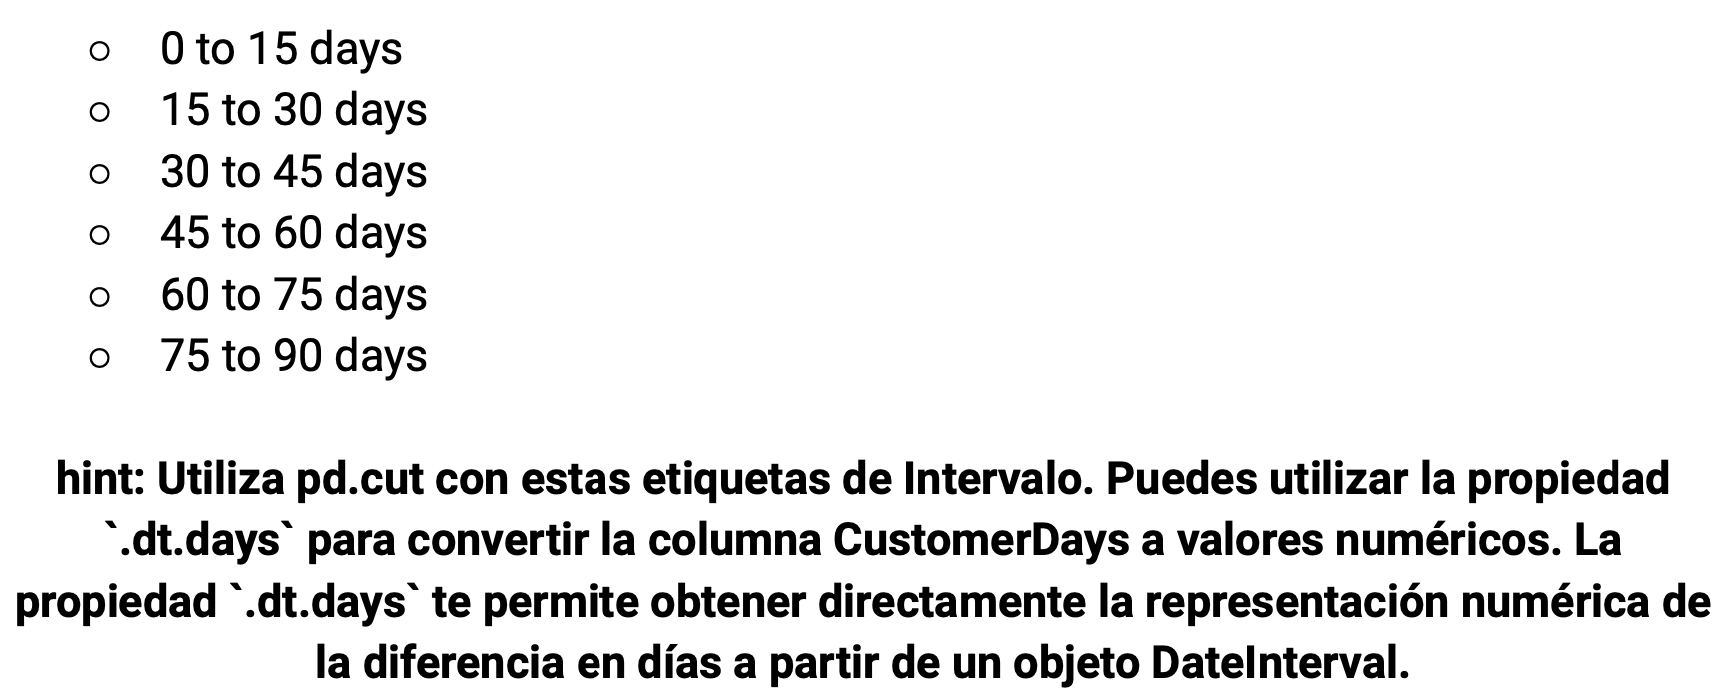

In [144]:
# Se definen los datos y etiquetas
bins = [0, 15, 30, 45, 60, 75, 90]
labels = ['0 to 15 days', '15 to 30 days', '30 to 45 days', '45 to 60 days', '60 to 75 days', '75 to 90 days']
# Se crea la columna CustomerDaysInterval con pd.cut
df_base['CustomerDaysInterval'] = pd.cut(df_base['CustomerDays'], bins=bins, labels=labels, right=True)
# Se visualizan algunas filas del DataFrame resultante
print(df_base[['CustomerDays', 'CustomerDaysInterval']].head())

   CustomerDays CustomerDaysInterval
0            19        15 to 30 days
1            32        30 to 45 days
2            31        30 to 45 days
3             7         0 to 15 days
4            26        15 to 30 days


<span style="color:#87CEEB; font-size:20px; font-weight:bold;">5.</span>
<span style="font-size:15px;">Utiliza una tabla pivote para mostrar el conteo de órdenes agrupando por Sales Team en las filas y CustomerDaysInterval en las columnas. Este reporte debe cuadrar con los datos de la pestaña Reporte1 del archivo reportes.xlsx</span>

In [145]:
"""
Se crea la tabla pivote que agrupa por Sales Team, se crean columnas para cada CustomerDaysInterval, se usa conteo de OrderNumber y se
reemplaza cualquier NaN con cero
"""
tabla_reporte_1 = df_base.pivot_table(
    index = 'Sales Team',
    columns = 'CustomerDaysInterval',
    values = 'OrderNumber',
    aggfunc = 'count',
    fill_value = 0
)
tabla_reporte_1['All'] = tabla_reporte_1.sum(axis=1)
tabla_reporte_1.loc['All'] = tabla_reporte_1.sum()
print(tabla_reporte_1)

CustomerDaysInterval  0 to 15 days  15 to 30 days  30 to 45 days  \
Sales Team                                                         
Adam Hernandez                  81            179             42   
Anthony Berry                   76            181             41   
Anthony Torres                  81            162             45   
Carl Nguyen                     96            178             40   
Carlos Miller                   65            148             34   
Chris Armstrong                 92            156             44   
Donald Reynolds                 97            163             36   
Douglas Tucker                  87            145             45   
Frank Brown                     85            150             40   
George Lewis                   104            169             42   
Jerry Green                     85            165             46   
Joe Price                       87            138             41   
Jonathan Hawkins                81            14

/var/folders/1w/3hr0pjc57r388nvn5rx5dzyw0000gn/T/ipykernel_9323/1756739650.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla_reporte_1 = df_base.pivot_table(


<span style="color:#87CEEB; font-size:20px; font-weight:bold;">6.</span>
<span style="font-size:15px;">Agrega la siguiente columna calculada a la base:</span>

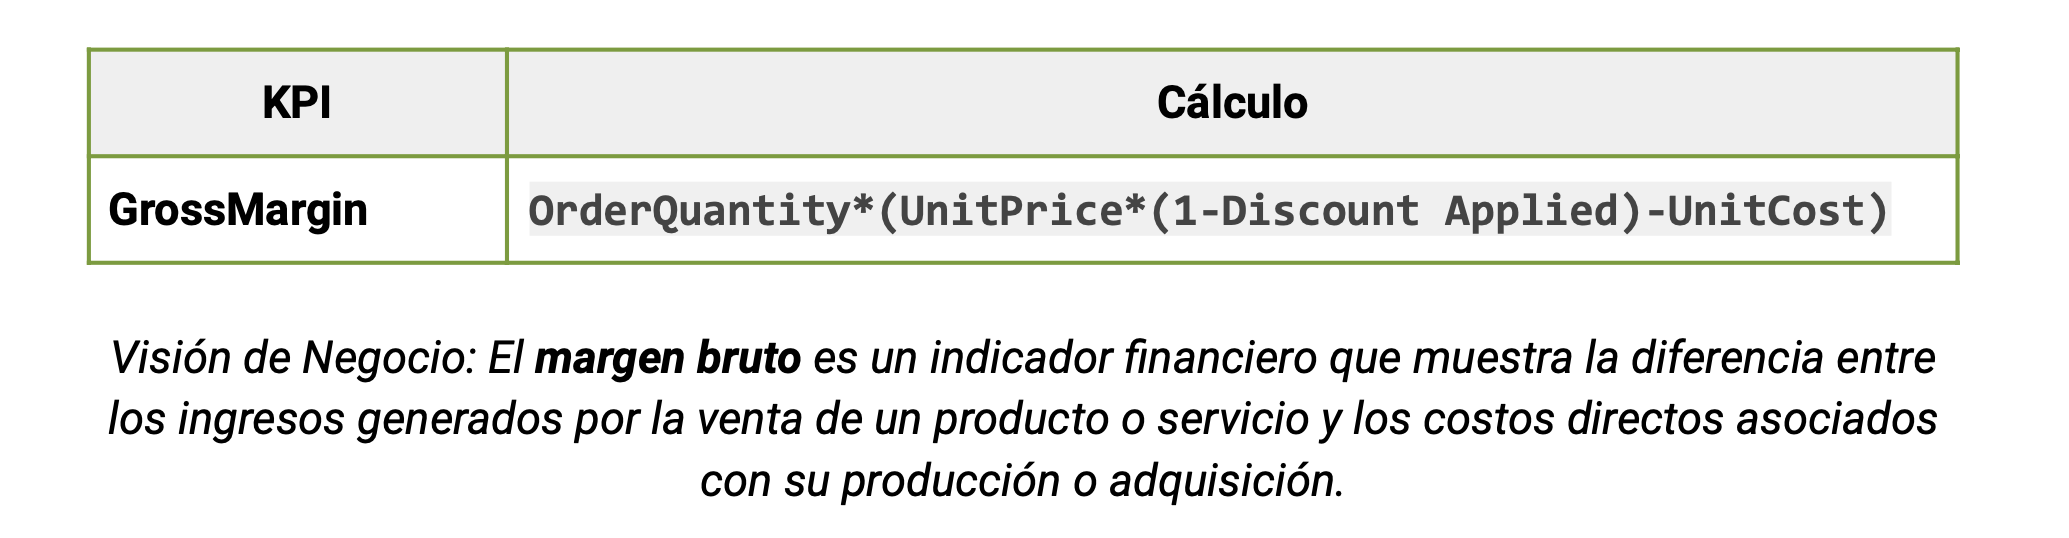

In [146]:
# Se calcula GrossMargin
df_base['GrossMargin'] = df_base['Order Quantity'] * (df_base['Unit Price'] * (1 - df_base['Discount Applied']) - df_base['Unit Cost']
)
# Se visualizan algunas filas del DataFrame
print(df_base.head())

   OrderNumber Sales Channel WarehouseCode ProcuredDate  OrderDate   ShipDate  \
0  SO - 000101      In-Store  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-14   
1  SO - 000102        Online  WARE-NMK1003   2017-12-31 2018-05-31 2018-06-22   
2  SO - 000103   Distributor  WARE-UHY1004   2017-12-31 2018-05-31 2018-06-21   
3  SO - 000104     Wholesale  WARE-NMK1003   2017-12-31 2018-05-31 2018-06-02   
4  SO - 000105   Distributor  WARE-NMK1003   2018-04-10 2018-05-31 2018-06-16   

  DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  ...         Time Zone  \
0   2018-06-19          USD             6           15  ...  America/New York   
1   2018-07-02          USD            14           20  ...   America/Chicago   
2   2018-07-01          USD            21           16  ...   America/Detroit   
3   2018-06-07          USD            28           48  ...  America/New York   
4   2018-06-26          USD            22           49  ...  America/New York   

       Product Name      S

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">7.</span>
<span style="font-size:15px;">En esta parte debes aplicar un porcentaje a la columna GrossMargin, pero ese porcentaje dependerá del intervalo en que se encuentre GrossMargin</span>

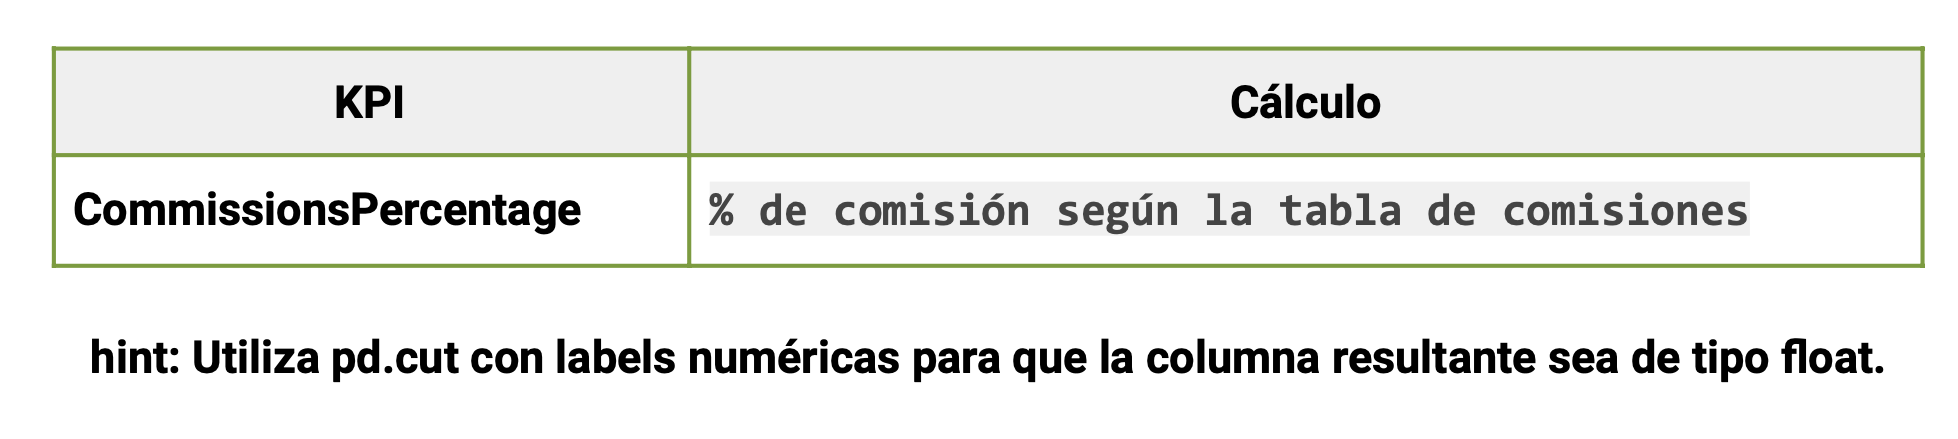

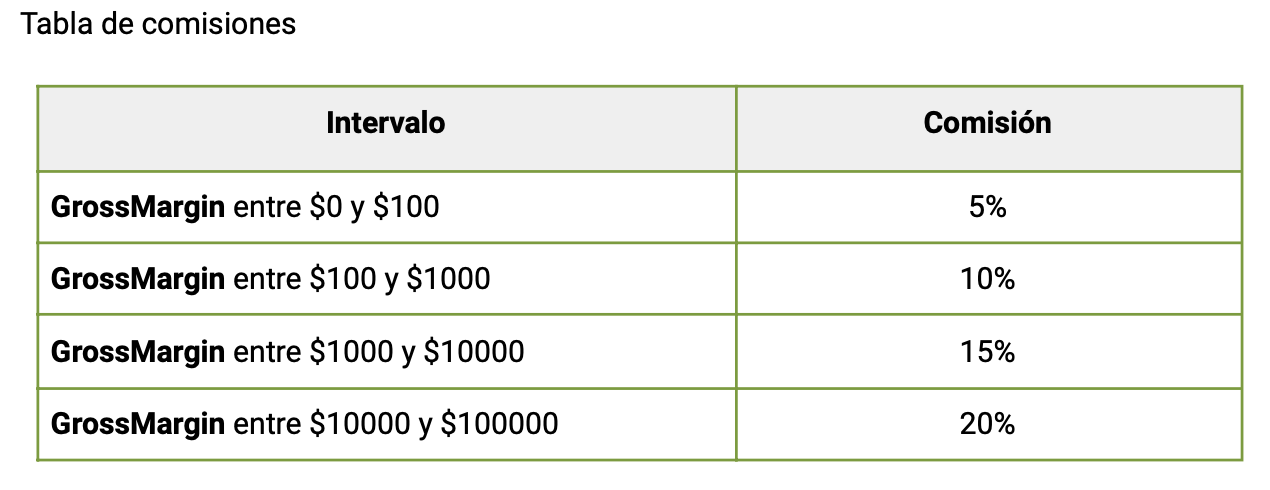

In [147]:
# Se definen los datos y etiquetas
bins = [0, 100, 1000, 10000, 100000]
labels = [0.05, 0.10, 0.15, 0.20]
# Se crea la columna CommissionsPercentage con pd.cut
df_base['CommissionsPercentage'] = pd.cut(df_base['GrossMargin'], bins=bins, labels=labels, right=True)
# Se convierte a tipo float
df_base['CommissionsPercentage'] = df_base['CommissionsPercentage'].astype(float)
# Se visualizan algunas filas y dos columnas del DataFrame resultante
print(df_base[['CommissionsPercentage', 'GrossMargin']].head())

   CommissionsPercentage  GrossMargin
0                   0.15    4073.4325
1                   0.10     886.4100
2                   0.10     905.5050
3                   0.15    5486.7640
4                   0.15    1312.1280


<span style="color:#87CEEB; font-size:20px; font-weight:bold;">8.</span>
<span style="font-size:15px;">Calcula el monto de la comisión, utilizando la Tabla del Anexo</span>

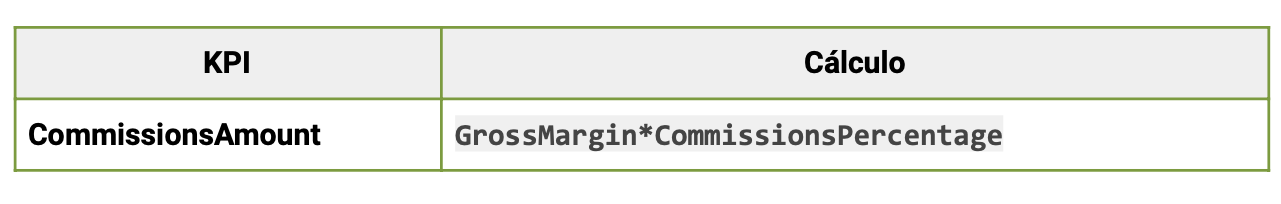

In [148]:
# Se crea la columna CommissionAmount
df_base['CommissionAmount'] = df_base['GrossMargin'] * df_base['CommissionsPercentage']
# Se convierte a tipo float
df_base['CommissionAmount'] = df_base['CommissionAmount'].astype(float)
# Se visualizan algunas filas y tres columnas del DataFrame resultante
print(df_base[['GrossMargin', 'CommissionsPercentage', 'CommissionAmount']].head())

   GrossMargin  CommissionsPercentage  CommissionAmount
0    4073.4325                   0.15        611.014875
1     886.4100                   0.10         88.641000
2     905.5050                   0.10         90.550500
3    5486.7640                   0.15        823.014600
4    1312.1280                   0.15        196.819200


<span style="color:#87CEEB; font-size:20px; font-weight:bold;">9.</span>
<span style="font-size:15px;">Calcula la comisión sobre el margen bruto</span>

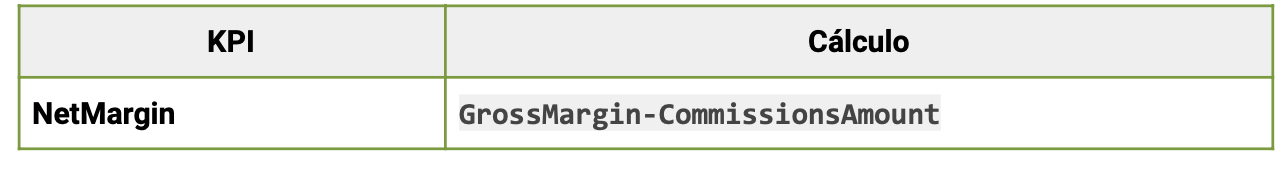

In [149]:
# Se crea la columna NetMargin
df_base['NetMargin'] = df_base['GrossMargin'] - df_base['CommissionAmount']
# Se convierte a tipo float
df_base['NetMargin'] = df_base['NetMargin'].astype(float)
# Se visualizan algunas filas y tres columnas del DataFrame resultante
print(df_base[['GrossMargin', 'CommissionAmount', 'NetMargin']].head())

   GrossMargin  CommissionAmount    NetMargin
0    4073.4325        611.014875  3462.417625
1     886.4100         88.641000   797.769000
2     905.5050         90.550500   814.954500
3    5486.7640        823.014600  4663.749400
4    1312.1280        196.819200  1115.308800


<span style="color:#87CEEB; font-size:20px; font-weight:bold;">10.</span>
<span style="font-size:15px;">Utilizando una tabla pivote, muestra la suma de los valores GrossMargin, NetMargin y CommissionAmount agrupando por Sales Team en las filas. Este reporte debe cuadrar con los datos de la pestaña Reporte2 del archivo reportes.xlsx</span>

In [151]:
"""
Se asegura el tipo de dato float para la suma, se crea la tabla pivote que agrupa por Sales Team, se crean columnas sumando GrossMargin, NetMargin, CommissionAmount y se
reemplaza cualquier NaN con cero
"""
df_base['GrossMargin'] = df_base['GrossMargin'].astype(float)
df_base['NetMargin'] = df_base['NetMargin'].astype(float)
df_base['CommissionAmount'] = df_base['CommissionAmount'].astype(float)

tabla_reporte_2 = df_base.pivot_table(
    index='Sales Team',
    values=['GrossMargin', 'NetMargin', 'CommissionAmount'],
    aggfunc='sum',
    fill_value=0
)

tabla_reporte_2.columns = ['GrossMargin', 'Net Margin', 'Commission Amount']

tabla_reporte_2.loc['All'] = tabla_reporte_2.sum()

def format_number(x):
    return f"{x:.2f}".replace('.', ',')

tabla_reporte_2 = tabla_reporte_2.applymap(format_number)

print(tabla_reporte_2)

                    GrossMargin   Net Margin Commission Amount
Sales Team                                                    
Adam Hernandez        126637,21    779095,20         677987,33
Anthony Berry         124061,18    767943,95         654798,34
Anthony Torres        117962,21    743901,44         636758,05
Carl Nguyen           123843,21    774781,47         661874,73
Carlos Miller         110882,09    668752,93         580326,02
Chris Armstrong       122565,71    781608,70         660857,42
Donald Reynolds       143768,34    885386,81         754038,26
Douglas Tucker        120806,40    745528,56         633786,05
Frank Brown           104839,47    670881,25         570076,79
George Lewis          136852,26    839150,75         710824,78
Jerry Green           126660,44    788587,76         670379,03
Joe Price             128822,93    787707,44         662662,11
Jonathan Hawkins      126216,95    781391,59         664629,88
Joshua Bennett        108049,11    661726,54         56

/var/folders/1w/3hr0pjc57r388nvn5rx5dzyw0000gn/T/ipykernel_9323/2313136451.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tabla_reporte_2 = tabla_reporte_2.applymap(format_number)
